C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8640\1781599342.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column_name].fillna(data[column_name].mean(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8640\1781599342.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data[column_name].resample('M').mean()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8640\1781599342.py:24: FutureWarning: 'Y' is deprecated and will be removed in a futu

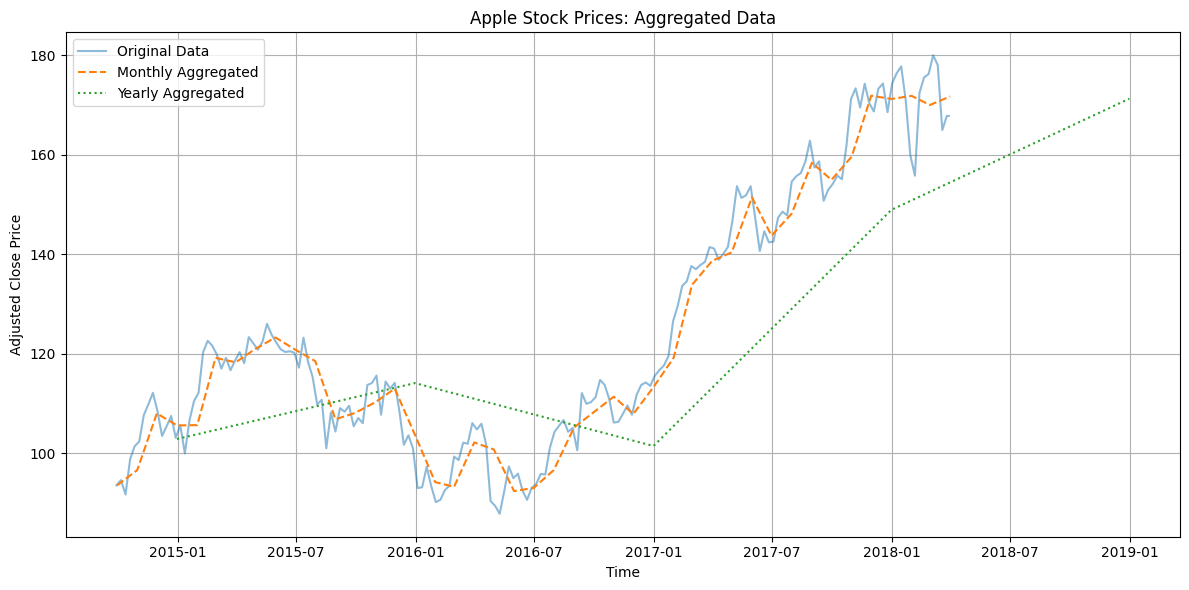

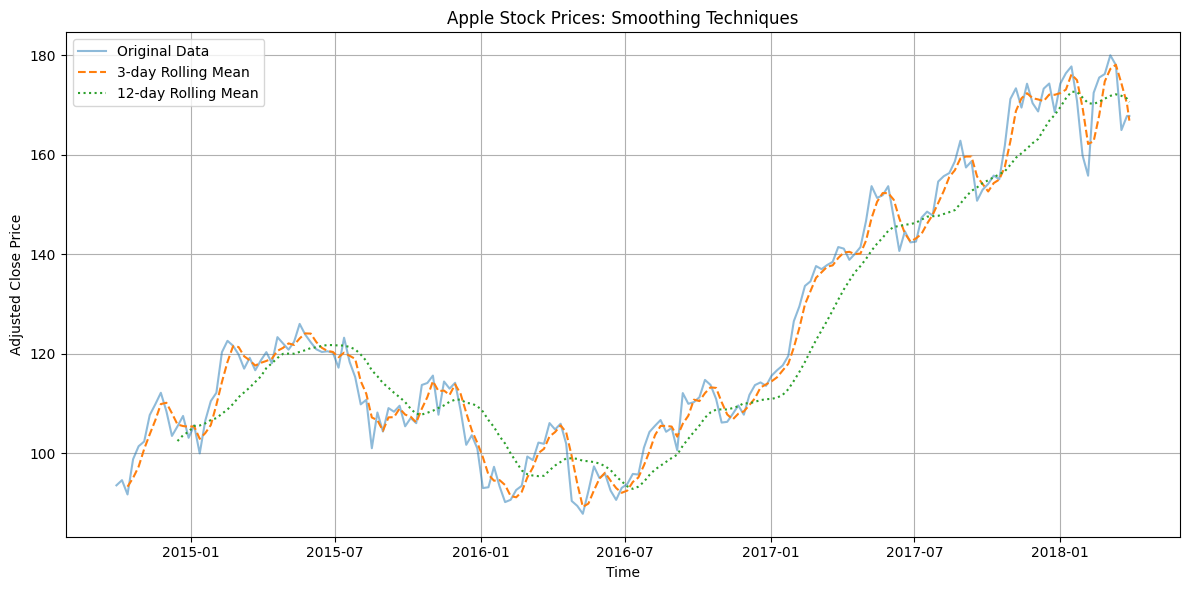

Aggregation and smoothing techniques applied successfully.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Apple stock data
file_path = "C:\\Users\\Lenovo\\Desktop\\tsa_exp_4\\apple_stock_prices.csv"
data = pd.read_csv(file_path)

# Ensure column names have no leading/trailing spaces
data.columns = data.columns.str.strip()

# Convert 'Date' column to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Use 'Adj Close' as the relevant column for analysis
column_name = 'Adj Close'

# Handle missing values by filling with the mean
data[column_name].fillna(data[column_name].mean(), inplace=True)

# Aggregation: Resample to monthly and yearly averages
monthly_data = data[column_name].resample('M').mean()
yearly_data = data[column_name].resample('Y').mean()

# Smoothing: Calculate rolling means (3-day and 12-day)
rolling_mean_3 = data[column_name].rolling(window=3).mean()
rolling_mean_12 = data[column_name].rolling(window=12).mean()

# Plot original data vs monthly/yearly aggregated data
plt.figure(figsize=(12, 6))
plt.plot(data[column_name], label='Original Data', alpha=0.5)
plt.plot(monthly_data, label='Monthly Aggregated', linestyle='dashed')
plt.plot(yearly_data, label='Yearly Aggregated', linestyle='dotted')
plt.title('Apple Stock Prices: Aggregated Data')
plt.xlabel('Time')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot original data vs smoothed data
plt.figure(figsize=(12, 6))
plt.plot(data[column_name], label='Original Data', alpha=0.5)
plt.plot(rolling_mean_3, label='3-day Rolling Mean', linestyle='dashed')
plt.plot(rolling_mean_12, label='12-day Rolling Mean', linestyle='dotted')
plt.title('Apple Stock Prices: Smoothing Techniques')
plt.xlabel('Time')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Aggregation and smoothing techniques applied successfully.")
